In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.load('conn_weight.npz')
r2r_conn = data['r2r_conn']
r2r_weight = data['r2r_weight']

In [3]:
r2r_weight = r2r_weight * r2r_conn
r2r_weight[r2r_weight == 0] = np.nan

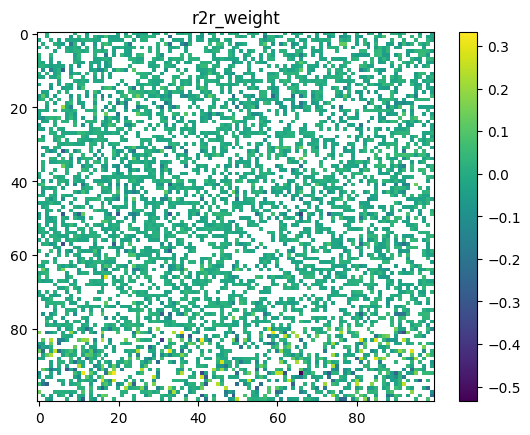

In [4]:
plt.imshow(r2r_weight, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('r2r_weight')
plt.show()

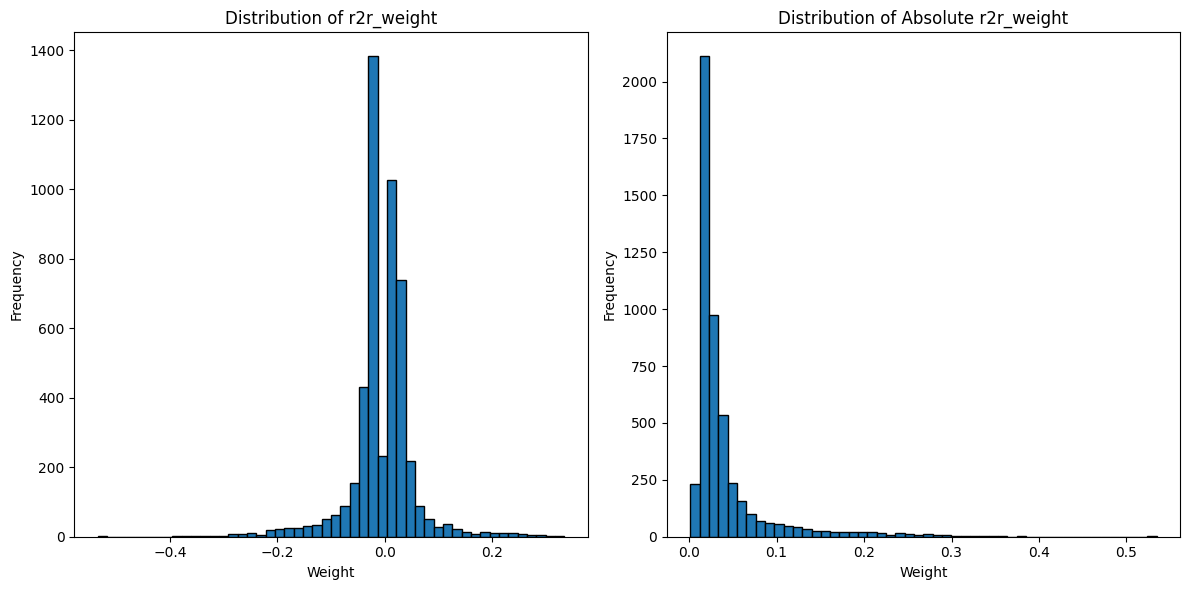

In [5]:
# 去除 NaN 值
r2r_weight_non_nan = r2r_weight[~np.isnan(r2r_weight)]

# 绘制原始数据的柱状图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2r_weight_non_nan, bins=50, edgecolor='black')
plt.title('Distribution of r2r_weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# 取绝对值后的数据
r2r_weight_abs = np.abs(r2r_weight_non_nan)

# 绘制绝对值后的柱状图
plt.subplot(1, 2, 2)
plt.hist(r2r_weight_abs, bins=50, edgecolor='black')
plt.title('Distribution of Absolute r2r_weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

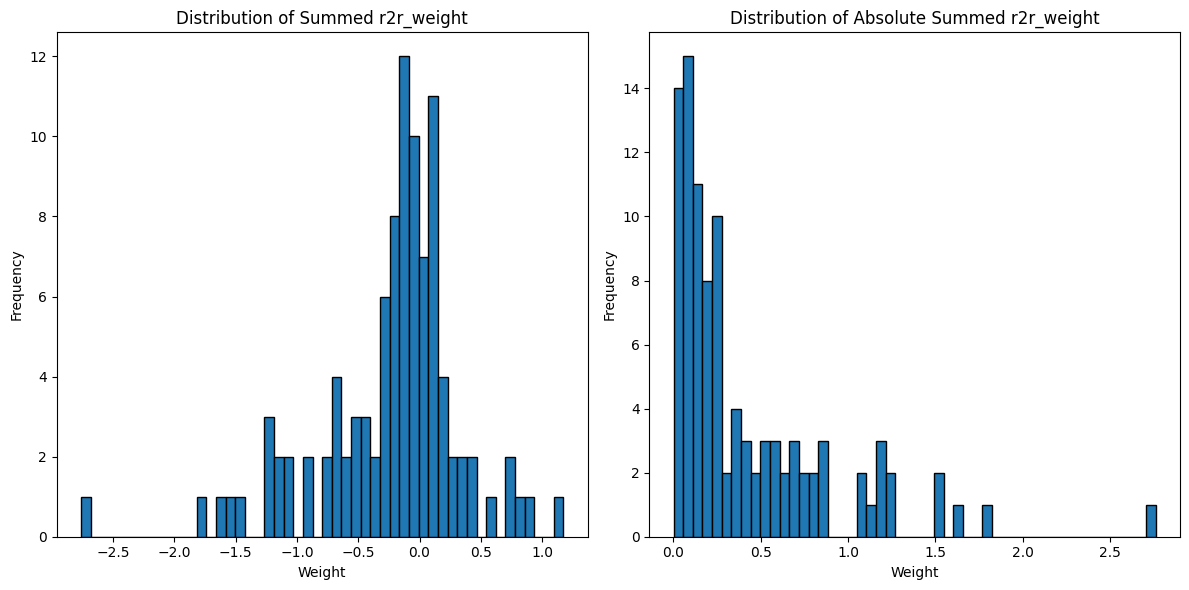

In [6]:
# 将 r2r_weight 竖着加起来
r2r_weight_sum = np.nansum(r2r_weight, axis=1)

# 绘制竖着加起来后的柱状图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2r_weight_sum, bins=50, edgecolor='black')
plt.title('Distribution of Summed r2r_weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# 取绝对值后的数据
r2r_weight_sum_abs = np.abs(r2r_weight_sum)

# 绘制绝对值后的柱状图
plt.subplot(1, 2, 2)
plt.hist(r2r_weight_sum_abs, bins=50, edgecolor='black')
plt.title('Distribution of Absolute Summed r2r_weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
from scipy.stats import genextreme

# 拟合 GEV 分布
shape, loc, scale = genextreme.fit(r2r_weight_abs)

# 打印拟合结果
print(f"Fit results: shape = {shape:.2f}, loc = {loc:.2f}, scale = {scale:.2f}")


Fit results: shape = -0.50, loc = 0.02, scale = 0.01


# Detect core-periphery structure in networks

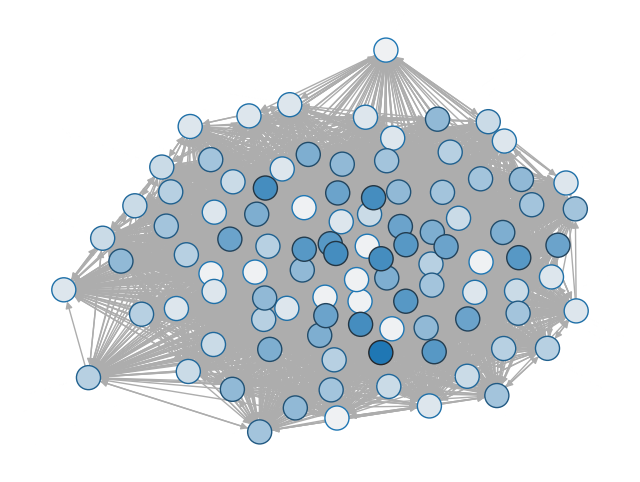

In [8]:
import networkx as nx
import cpnet

# 创建一个有向图
G = nx.DiGraph()

# 获取节点数
num_nodes = r2r_conn.shape[0]

# 添加节点
G.add_nodes_from(range(num_nodes))

# 添加边和权重
for i in range(num_nodes):
    for j in range(num_nodes):
        if r2r_conn[i, j]:
            G.add_edge(i, j, weight=np.abs(r2r_weight[i, j]))

alg = cpnet.Rossa() # Load the Borgatti-Everett algorithm
alg.detect(G) # Feed the network as an input

x = alg.get_coreness()  # Get the coreness of nodes
c = alg.get_pair_id()  # Get the group membership of nodes

fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax)

In [11]:
x_sorted = dict(sorted(x.items(), key=lambda item: item[1], reverse=True))
print(x_sorted)

{33: np.float64(1.0), 92: np.float64(0.9897800059292472), 16: np.float64(0.9592104401628383), 49: np.float64(0.9499313443027781), 64: np.float64(0.9285093983496457), 76: np.float64(0.9134261069090639), 24: np.float64(0.8982615606338056), 83: np.float64(0.8908056456753565), 86: np.float64(0.8641595846783839), 87: np.float64(0.8423721247609367), 22: np.float64(0.8258248259352677), 91: np.float64(0.8137627025188724), 59: np.float64(0.7899724667391068), 93: np.float64(0.779697933043526), 20: np.float64(0.7632348127504675), 98: np.float64(0.746930458416072), 66: np.float64(0.7295825472435865), 23: np.float64(0.7204718479396127), 82: np.float64(0.7093961098988794), 11: np.float64(0.6907248917069879), 34: np.float64(0.6821739976983056), 77: np.float64(0.6717790910395532), 94: np.float64(0.6641452995287387), 95: np.float64(0.6446012199453793), 80: np.float64(0.6215909802138053), 31: np.float64(0.6063912912532573), 90: np.float64(0.5957691736987998), 85: np.float64(0.5818456918415185), 70: np.f

In [14]:
# 获取前50%的阈值
threshold = np.percentile(list(x_sorted.values()), 50)

# 创建一个新的ndarray来存储划分后的值
x_binary = np.zeros(len(x_sorted), dtype=int)
for idx, key in enumerate(x_sorted.keys()):
    x_binary[key] = 1 if x_sorted[key] >= threshold else 0

print(x_binary)

[0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0
 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0]
